# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
import citipy
from citipy import citipy
from api_keys import weather_api_key
from datetime import date
from scipy.stats import linregress

In [2]:
city = citipy.nearest_city(32,32)
city
#<citipy.City instance at 0x1069b6518>
city.city_name     # Tainan, my home town
#'tainan'
city.country_code
#'tw'                 
# And the country is surely Taiwan

'eg'

## Generate Cities List

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#nearby


# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

cities = ["Paris", "London", "Oslo", "Beijing"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075]
The temperature information received is: [27.78, 25.06, 23.27, 25.35]


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# read in the data

city_data_df = pd.read_csv("../output_data/cities.csv")
city_data_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# Remove rows with humidity greater than 100%
city_data_filtered_df =city_data_df.loc[city_data_df['Humidity'] < 100.1]
city_data_filtered_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [6]:
#  Get the indices of cities that have humidity over 100%.
# Get rows with humidity greater than 100%
city_data_greater100per_df = city_data_df.loc[city_data_df['Humidity'] > 100]
city_data_greater100per_df.index

Int64Index([129], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = city_data_df.loc[city_data_df.index != 129]

clean_city_data_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

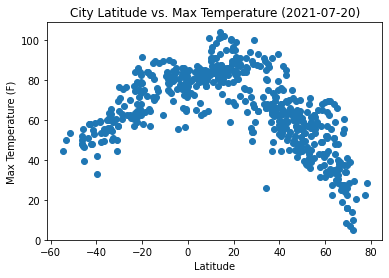

In [8]:
# Plot the latitude versus temperature
today = date.today()
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.scatter(clean_city_data_df['Lat'], clean_city_data_df['Max Temp'])

plt.savefig('C:/Users/jjel0\OneDrive/Homework/python-api-challenge/output_data/LatVsTempFig')

plt.show()



## Latitude vs. Humidity Plot

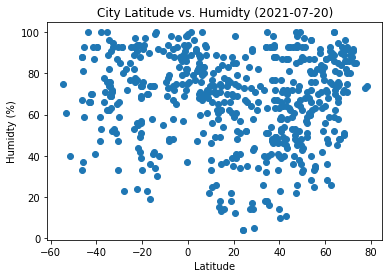

In [9]:
# Plot the latitude versus humidity

plt.title(f'City Latitude vs. Humidty ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidty (%)')
plt.scatter(clean_city_data_df['Lat'], clean_city_data_df['Humidity'])

plt.savefig('C:/Users/jjel0\OneDrive/Homework/python-api-challenge/output_data/LatVsHumidityFig')

plt.show()

## Latitude vs. Cloudiness Plot

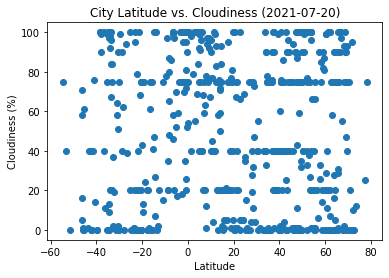

In [10]:
# Plot the latitude versus humidity

plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.scatter(clean_city_data_df['Lat'], clean_city_data_df['Cloudiness'])

plt.savefig('C:/Users/jjel0\OneDrive/Homework/python-api-challenge/output_data/LatVsCloudinessFig')

plt.show()

## Latitude vs. Wind Speed Plot

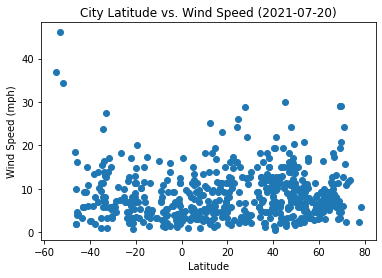

In [11]:
# Plot the latitude versus humidity

plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(clean_city_data_df['Lat'], clean_city_data_df['Wind Speed'])

plt.savefig('C:/Users/jjel0\OneDrive/Homework/python-api-challenge/output_data/LatVsWindSpeedFig')

plt.show()

## Linear Regression

In [12]:
# Create a dataframe for the Northern Hemisphere and one for the Southern Hemisphere
clean_city_data_SH_df = pd.DataFrame()
clean_city_data_NH_df = pd.DataFrame()
#

clean_city_data_NH_df = clean_city_data_df[clean_city_data_df['Lat'] > 0]
clean_city_data_SH_df = clean_city_data_df[clean_city_data_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8152


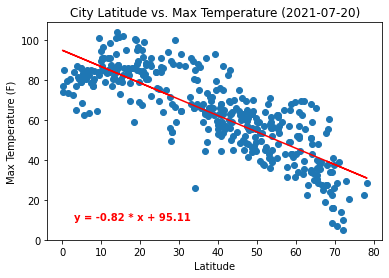

In [13]:
# Plot the latitude versus temperature
today = date.today()
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.scatter(clean_city_data_NH_df['Lat'], clean_city_data_NH_df['Max Temp'])

# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_NH_df['Lat'], clean_city_data_NH_df['Max Temp'])

# Print the correlation coefficient
print(f"The r-value is: {round(rvalue, 4)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * clean_city_data_NH_df['Lat'] + intercept
plt.plot(clean_city_data_NH_df['Lat'],tv_vs_wt_fit,'-', color='r');

# add the regression 
plt.text(3, 10, f"y = {round(slope, 2)} * x + {round(intercept, 2)}", horizontalalignment='left', size='medium', color='r', weight='semibold')

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7668


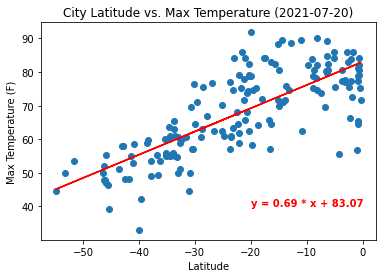

In [14]:
# Plot the latitude versus temperature
today = date.today()
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.scatter(clean_city_data_SH_df['Lat'], clean_city_data_SH_df['Max Temp'])

# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_SH_df['Lat'], clean_city_data_SH_df['Max Temp'])

# Print the correlation coefficient
print(f"The r-value is: {round(rvalue, 4)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * clean_city_data_SH_df['Lat'] + intercept
plt.plot(clean_city_data_SH_df['Lat'],tv_vs_wt_fit,'-', color='r');

# add the regression 
plt.text(-20, 40, f"y = {round(slope, 2)} * x + {round(intercept, 2)}", horizontalalignment='left', size='medium', color='r', weight='semibold')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1036


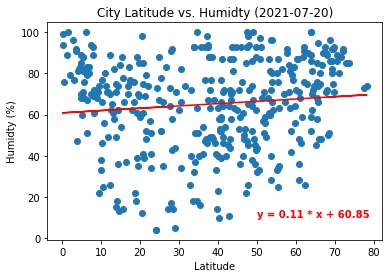

In [15]:
# Plot the latitude versus humidity

plt.title(f'City Latitude vs. Humidty ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidty (%)')
plt.scatter(clean_city_data_NH_df['Lat'], clean_city_data_NH_df['Humidity'])

# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_NH_df['Lat'], clean_city_data_NH_df['Humidity'])

# Print the correlation coefficient
print(f"The r-value is: {round(rvalue, 4)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * clean_city_data_NH_df['Lat'] + intercept
plt.plot(clean_city_data_NH_df['Lat'],tv_vs_wt_fit,'-', color='r');

# add the regression 
plt.text(50, 10, f"y = {round(slope, 2)} * x + {round(intercept, 2)}", horizontalalignment='left', size='medium', color='r', weight='semibold')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.114


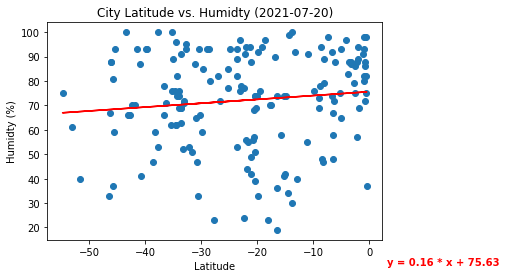

In [16]:
# Plot the latitude versus humidity

plt.title(f'City Latitude vs. Humidty ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidty (%)')
plt.scatter(clean_city_data_SH_df['Lat'], clean_city_data_SH_df['Humidity'])

# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_SH_df['Lat'], clean_city_data_SH_df['Humidity'])

# Print the correlation coefficient
print(f"The r-value is: {round(rvalue, 4)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * clean_city_data_SH_df['Lat'] + intercept
plt.plot(clean_city_data_SH_df['Lat'],tv_vs_wt_fit,'-', color='r');

# add the regression 
plt.text(3+0.2, 4.5, f"y = {round(slope, 2)} * x + {round(intercept, 2)}", horizontalalignment='left', size='medium', color='r', weight='semibold')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.0873


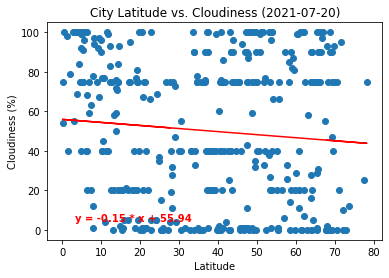

In [17]:
# Plot the latitude versus humidity

plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.scatter(clean_city_data_NH_df['Lat'], clean_city_data_NH_df['Cloudiness'])

# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_NH_df['Lat'], clean_city_data_NH_df['Cloudiness'])

# Print the correlation coefficient
print(f"The r-value is: {round(rvalue, 4)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * clean_city_data_NH_df['Lat'] + intercept
plt.plot(clean_city_data_NH_df['Lat'],tv_vs_wt_fit,'-', color='r');

# add the regression 
plt.text(3+0.2, 4.5, f"y = {round(slope, 2)} * x + {round(intercept, 2)}", horizontalalignment='left', size='medium', color='r', weight='semibold')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2301


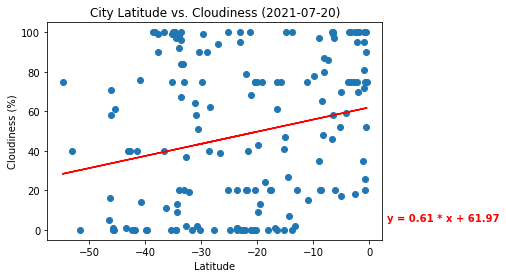

In [18]:
# Plot the latitude versus humidity

plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.scatter(clean_city_data_SH_df['Lat'], clean_city_data_SH_df['Cloudiness'])

# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_SH_df['Lat'], clean_city_data_SH_df['Cloudiness'])

# Print the correlation coefficient
print(f"The r-value is: {round(rvalue, 4)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * clean_city_data_SH_df['Lat'] + intercept
plt.plot(clean_city_data_SH_df['Lat'],tv_vs_wt_fit,'-', color='r');

# add the regression 
plt.text(3+0.2, 4.5, f"y = {round(slope, 2)} * x + {round(intercept, 2)}", horizontalalignment='left', size='medium', color='r', weight='semibold')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1071


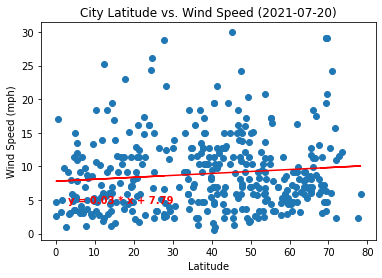

In [19]:
# Plot the latitude versus humidity

plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(clean_city_data_NH_df['Lat'], clean_city_data_NH_df['Wind Speed'])

# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_NH_df['Lat'], clean_city_data_NH_df['Wind Speed'])

# Print the correlation coefficient
print(f"The r-value is: {round(rvalue, 4)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * clean_city_data_NH_df['Lat'] + intercept
plt.plot(clean_city_data_NH_df['Lat'],tv_vs_wt_fit,'-', color='r');

# add the regression 
plt.text(3+0.2, 4.5, f"y = {round(slope, 2)} * x + {round(intercept, 2)}", horizontalalignment='left', size='medium', color='r', weight='semibold')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3361


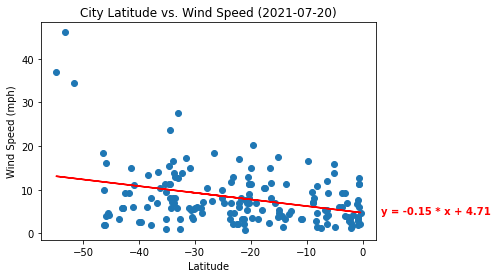

In [20]:
# Plot the latitude versus humidity

plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(clean_city_data_SH_df['Lat'], clean_city_data_SH_df['Wind Speed'])

# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_SH_df['Lat'], clean_city_data_SH_df['Wind Speed'])

# Print the correlation coefficient
print(f"The r-value is: {round(rvalue, 4)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * clean_city_data_SH_df['Lat'] + intercept
plt.plot(clean_city_data_SH_df['Lat'],tv_vs_wt_fit,'-', color='r');

# add the regression 
plt.text(3+0.2, 4.5, f"y = {round(slope, 2)} * x + {round(intercept, 2)}", horizontalalignment='left', size='medium', color='r', weight='semibold')

plt.show()